<a href="https://colab.research.google.com/github/Vivek-khatik/Data_Analytics_And_Data_Science/blob/main/Data_Analytics_and_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This WorkSpace is in 2 parts where first part is Data Analytics Part and the other one contains Data Science Part. For both the parts I have used two different datasets.
For DataAnalytics I have used Ecommerce Store Data Set AND
For Data Science I have used Diabetes Data Set

# **Data Analytics**

# **E-Commerce Store Analysis.**
In this document I had used ecommerce company dataset where I analysed the dataset and gain some insights from it and also perform some activities which could be useful for the store. I  have also visualized some of the insights.

**Load the Dataset E-commerce dataset.csv**

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [187]:
df=pd.read_csv("/content/E-commerce dataset.csv")
df.head(4)

,Order ID,Order Date,Year,Month,Employee,State,City,Quantity,Category,Sub-Category,Sale,Profit,Target,State code,Row,coloumn
0,B-25761,25-08-2018,2018,August,Surabhi,Maharashtra,Mumbai,5,Furniture,Bookcases,2188,1050,3000,MH,0.0,0.5
1,B-25862,15-11-2018,2018,November,Amol,Bihar,Patna,5,Furniture,Bookcases,2061,701,3000,BR,6.0,7.5
2,B-26006,09-02-2019,2019,February,Arpita,Karnataka,Bangalore,5,Electronics,Accessories,1301,573,2500,KA,5.0,6.0
3,B-25877,24-11-2018,2018,November,Dashyam,Gujarat,Surat,2,Clothing,Trousers,1137,568,1500,GJ,5.0,3.0


# Performing some Pre Processing steps.

In [188]:
df.columns

Index(['Order ID', 'Order Date', 'Year', 'Month', 'Employee', 'State', 'City',
       'Quantity', 'Category', 'Sub-Category', 'Sale', 'Profit', 'Target',
       'State code', 'Row', 'coloumn'],
      dtype='object')

In [189]:
df.describe()

,Year,Quantity,Sale,Profit,Target,Row,coloumn
count,500.00000,500.000000,500.000000,500.000000,500.000000,37.000000,37.000000
mean,2018.34600,3.826000,270.330000,9.610000,1940.000000,3.918919,6.270270
std,0.47617,2.177431,382.514554,185.259829,619.813147,1.963251,3.178912
min,2018.00000,1.000000,6.000000,-1864.000000,500.000000,0.000000,0.500000
25%,2018.00000,2.000000,45.750000,-8.000000,1500.000000,3.000000,3.500000
50%,2018.00000,3.000000,118.000000,10.000000,1500.000000,4.000000,6.000000
75%,2019.00000,5.000000,304.250000,38.000000,2500.000000,5.000000,8.500000
max,2019.00000,13.000000,2188.000000,1050.000000,3000.000000,8.000000,12.000000


In [190]:
df.isna().sum()

Order ID          0
Order Date        0
Year              0
Month             0
Employee          0
State             0
City              0
Quantity          0
Category          0
Sub-Category      0
Sale              0
Profit            0
Target            0
State code        0
Row             463
coloumn         463
dtype: int64

# Removing Unwanted Columns from the dataset

In [191]:
#Removing two columns of no use
df.drop(['Row','coloumn'],axis=1,inplace=True)
df.shape

(500, 14)

# Getting the State Wise Profit

In [192]:
#Maximum Profit by a state
max_sales_year=df.groupby(['State'],as_index=False)['Profit'].sum()
max_sales_year.sort_values(by='Profit',ascending=False)

,State,Profit
11,Maharashtra,2274
9,Kerala,1129
18,West Bengal,1033
8,Karnataka,915
2,Delhi,903
5,Haryana,850
17,Uttar Pradesh,804
10,Madhya Pradesh,675
1,Bihar,658
15,Sikkim,261


Text(0.5, 1.0, 'Statewise Profit')

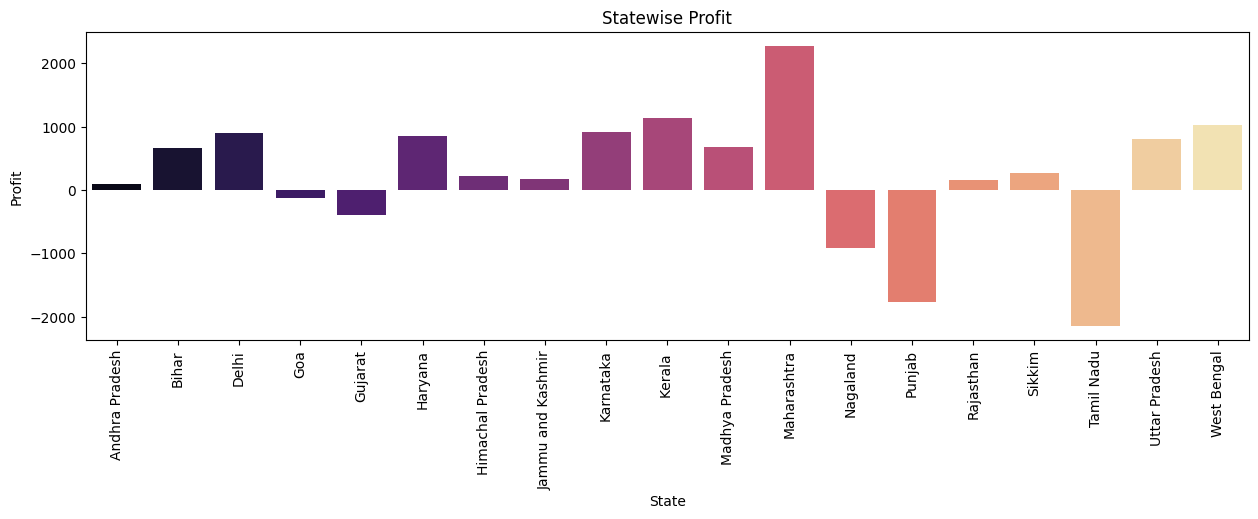

In [193]:
plt.figure(figsize=(15,4))
sns.barplot(x='State',y='Profit',palette="magma",data= max_sales_year)
plt.xticks(rotation='vertical')
plt.title("Statewise Profit")

# Maharastra State has the highest number of profit where as TamilNadu State has highest number of loss

# Giving Discount of 50rs where the profit is more than 500rs

In [194]:
#Modifying Profit Columns Value by giving 50rs discount where sales are more than 500rs
df['Profit'] = np.where(df['Profit']>=500, df['Profit']-50, df['Profit'])
df.query("Profit > 500")

,Order ID,Order Date,Year,Month,Employee,State,City,Quantity,Category,Sub-Category,Sale,Profit,Target,State code
0,B-25761,25-08-2018,2018,August,Surabhi,Maharashtra,Mumbai,5,Furniture,Bookcases,2188,1000,3000,MH
1,B-25862,15-11-2018,2018,November,Amol,Bihar,Patna,5,Furniture,Bookcases,2061,651,3000,BR
2,B-26006,09-02-2019,2019,February,Arpita,Karnataka,Bangalore,5,Electronics,Accessories,1301,523,2500,KA
3,B-25877,24-11-2018,2018,November,Dashyam,Gujarat,Surat,2,Clothing,Trousers,1137,518,1500,GJ


# Calculating the Salary of Employee as per their Sale where 10% on every sale is given on every sale.

In [195]:
# Inserting a Column at 11th Position Where Salary of Employee is counted as 10% on basis of sale

df.insert(11,'Salary',0)
df['Salary']=np.where(df['Salary']==0,df['Sale']*10/100,df['Salary'])
df

,Order ID,Order Date,Year,Month,Employee,State,City,Quantity,Category,Sub-Category,Sale,Salary,Profit,Target,State code
0,B-25761,25-08-2018,2018,August,Surabhi,Maharashtra,Mumbai,5,Furniture,Bookcases,2188,218.8,1000,3000,MH
1,B-25862,15-11-2018,2018,November,Amol,Bihar,Patna,5,Furniture,Bookcases,2061,206.1,651,3000,BR
2,B-26006,09-02-2019,2019,February,Arpita,Karnataka,Bangalore,5,Electronics,Accessories,1301,130.1,523,2500,KA
3,B-25877,24-11-2018,2018,November,Dashyam,Gujarat,Surat,2,Clothing,Trousers,1137,113.7,518,1500,GJ
4,B-25929,02-01-2019,2019,January,Girase,Kerala,Thiruvananthapuram,3,Furniture,Bookcases,1308,130.8,486,3000,KL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,B-25666,22-05-2018,2018,May,Tanvi,Punjab,Chandigarh,7,Electronics,Electronic Games,934,93.4,-916,2500,PB
496,B-25779,12-09-2018,2018,September,Savi,Madhya Pradesh,Indore,3,Furniture,Tables,1361,136.1,-980,3000,MP
497,B-25601,01-04-2018,2018,April,Bharat,Gujarat,Ahmedabad,7,Furniture,Bookcases,1275,127.5,-1148,3000,GJ
498,B-26022,18-02-2019,2019,February,Shrichand,Punjab,Chandigarh,8,Electronics,Phones,1824,182.4,-1303,2500,PB


# Fetching TOP 5 Employees having higher salary.

In [196]:
grp_by_emp=df.groupby(by='Employee',as_index=False)['Salary'].sum()
sort_by_sal=grp_by_emp.sort_values(['Salary'],ascending=False)
sort_by_sal.head()

,Employee,Salary
296,Surabhi,397.2
167,Mukesh,276.3
225,Rohan,231.1
281,Soumya,224.6
266,Shrichand,216.9


#Displaying Sales in DECREASING order as per Month.

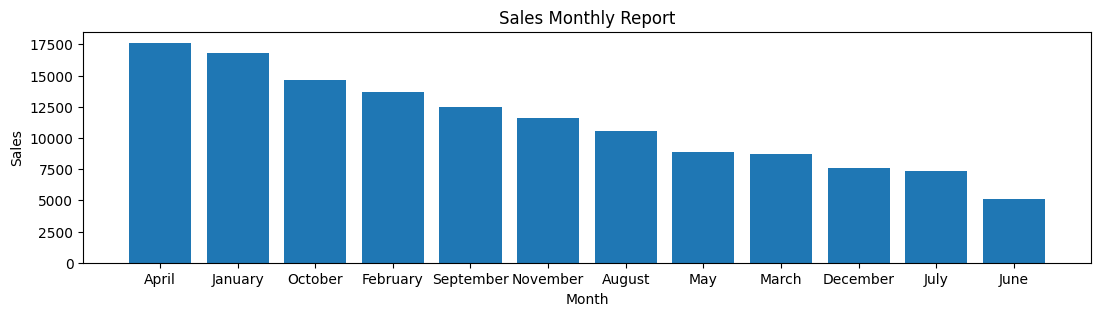

In [197]:

group_Month=df.groupby('Month',as_index=False)['Sale'].sum()
sort_df=group_Month.sort_values('Sale',ascending=False)

plt.figure(figsize=(13,3))
plt.bar(sort_df['Month'],sort_df['Sale'])

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Monthly Report')

plt.show()

# Using boxplot we can know what are the highest number of quantity a category is being ordered.

<Axes: xlabel='Category', ylabel='Quantity'>

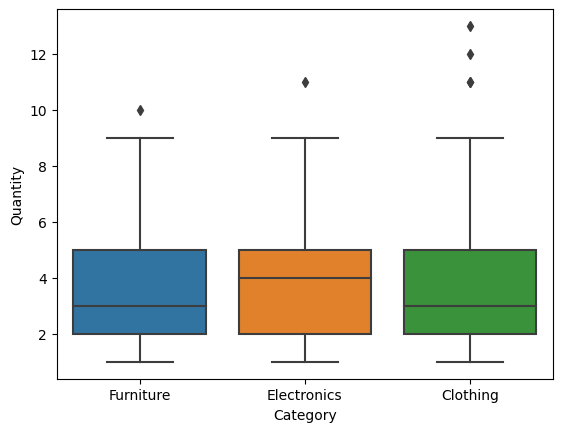

In [198]:
sns.boxplot(x='Category',y='Quantity',data=df)

In [199]:
#Exporting Updated Dataset into CSV File

df.to_csv('/content/Updated_Salary_Ecomm.csv' , index=False)

# **Data Science**
Here, I've taken Diabetes dataset where I'll split the data into predictor and target variable.I'll use two models SVM and KNN and based on their accuracy score I'll use the model for predicting diabetes.

# Reading the Dataset name diabetes.csv

In [200]:
import pandas as pd
diabetes_df= pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Spliting Predictor Variable

In [201]:
x=diabetes_df.iloc[:,0:8]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# Spliting Target Variable

In [202]:
y=diabetes_df.iloc[:,8]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Using train and test split to split the datset in the ratio of 60 and 40

In [203]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6)
print('x_train size= ',x_train.shape)
print('x_test size= ',x_test.shape)
print('y_train size= ',y_train.shape)
print('y_test size= ',y_test.shape)

x_train size=  (307, 8)
x_test size=  (461, 8)
y_train size=  (307,)
y_test size=  (461,)


# Importing SVM from SVC and training the model with training data and predicting the outcome from test data.

In [204]:
from sklearn.svm import SVC
svc_model=SVC(kernel='sigmoid')

svc_model.fit(x_train,y_train)

y_pred=svc_model.predict(x_test)

In [205]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [206]:
y_test

265    0
125    1
463    0
31     1
766    1
      ..
10     0
291    1
366    1
178    0
594    0
Name: Outcome, Length: 461, dtype: int64

In [207]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[220,  77],
       [152,  12]])

# Heatmap of the confusion matrix

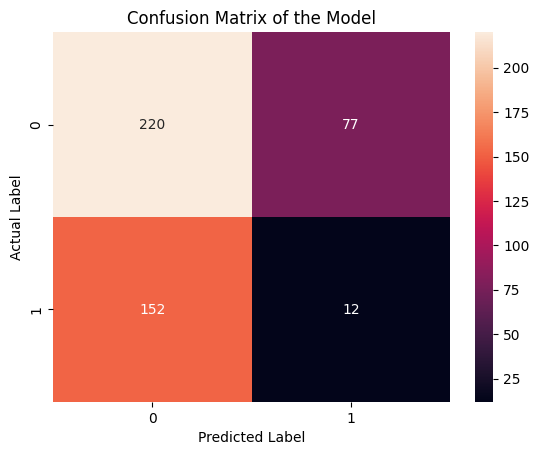

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix of the Model")
plt.show()

# Accuracy score is 0.55


In [209]:
#Scores:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", "{:.2f}".format(accuracy))

Accuracy   : 0.50


# Importing KNeighborsClassifier from sklearn.neighbors and training the model with training data and predicting the outcome from test data.

In [210]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_knn.fit(x_train,y_train)

y_pred_knn=classifier_knn.predict(x_test)

In [211]:
y_pred_knn

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [212]:
y_test

265    0
125    1
463    0
31     1
766    1
      ..
10     0
291    1
366    1
178    0
594    0
Name: Outcome, Length: 461, dtype: int64

In [213]:
cm_knn=confusion_matrix(y_test,y_pred_knn)

# Heatmap of the confusion matrix

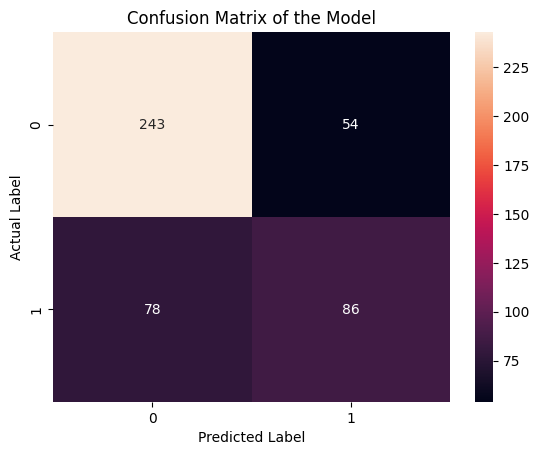

In [214]:
sns.heatmap(cm_knn,annot=True,fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix of the Model")
plt.show()

# Accuracy score is 0.70

In [215]:
#Scores:
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy   :", "{:.2f}".format(accuracy))

Accuracy   : 0.71


**We can conclude that KNeighbor accuracy is higher than SVM so we can take KNeighbor's model into consideration to predict the diabetes of the person.**